#Decision Tree Regression

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
dataset = pd.read_csv('Position_Salaries.csv')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [35]:
dataset


,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [44]:
#لازم رينج
x = dataset.iloc[:,1:-1].values
y = dataset.iloc[:,-1]

In [37]:
from sklearn.tree import DecisionTreeRegressor
regreesor = DecisionTreeRegressor()
regreesor.fit(x,y)

DecisionTreeRegressor()

In [38]:
from sklearn.tree import export_text
text = export_text(regreesor)

In [39]:
print(text)

|--- feature_0 <= 8.50
|   |--- feature_0 <= 6.50
|   |   |--- feature_0 <= 4.50
|   |   |   |--- feature_0 <= 3.50
|   |   |   |   |--- feature_0 <= 2.50
|   |   |   |   |   |--- feature_0 <= 1.50
|   |   |   |   |   |   |--- value: [45000.00]
|   |   |   |   |   |--- feature_0 >  1.50
|   |   |   |   |   |   |--- value: [50000.00]
|   |   |   |   |--- feature_0 >  2.50
|   |   |   |   |   |--- value: [60000.00]
|   |   |   |--- feature_0 >  3.50
|   |   |   |   |--- value: [80000.00]
|   |   |--- feature_0 >  4.50
|   |   |   |--- feature_0 <= 5.50
|   |   |   |   |--- value: [110000.00]
|   |   |   |--- feature_0 >  5.50
|   |   |   |   |--- value: [150000.00]
|   |--- feature_0 >  6.50
|   |   |--- feature_0 <= 7.50
|   |   |   |--- value: [200000.00]
|   |   |--- feature_0 >  7.50
|   |   |   |--- value: [300000.00]
|--- feature_0 >  8.50
|   |--- feature_0 <= 9.50
|   |   |--- value: [500000.00]
|   |--- feature_0 >  9.50
|   |   |--- value: [1000000.00]



prediciting new result

In [40]:
regreesor.predict([[3.2]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"


array([60000.])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"


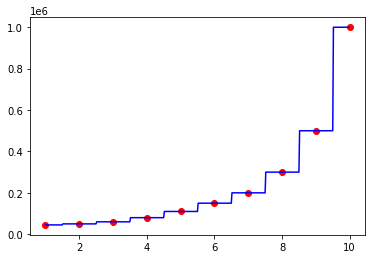

In [47]:
xGrid= np.arange(min(x),max(x),0.02)
xGrid = xGrid.reshape((len(xGrid),1))
plt.scatter(x,y,color='red')
plt.plot(xGrid,regreesor.predict(xGrid),color='blue')
